In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# unique class names
df['class'].unique()
# convert classes to numbers 0 and 1
df['class'] = (df['class'] == 'g').astype(int)
df['class'].unique()

array([1, 0])

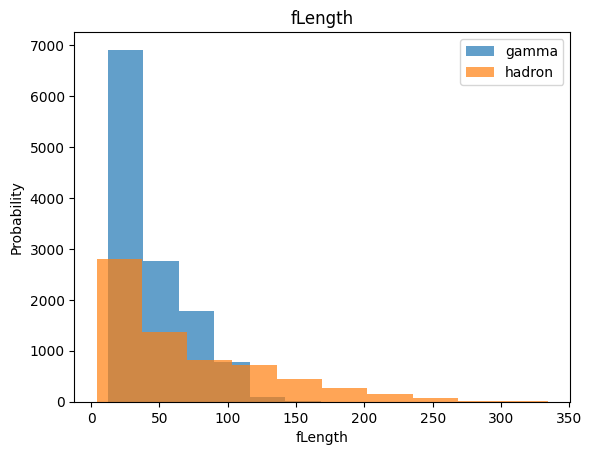

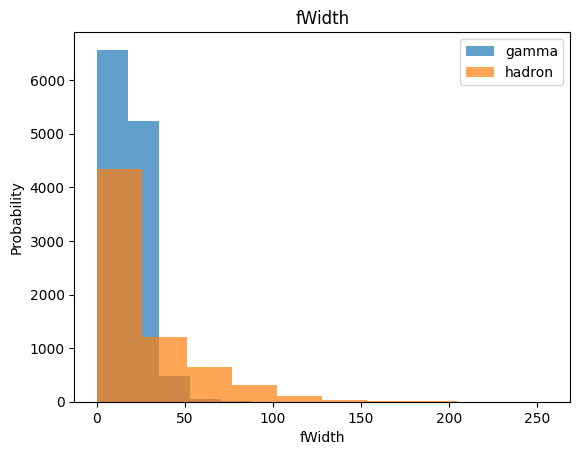

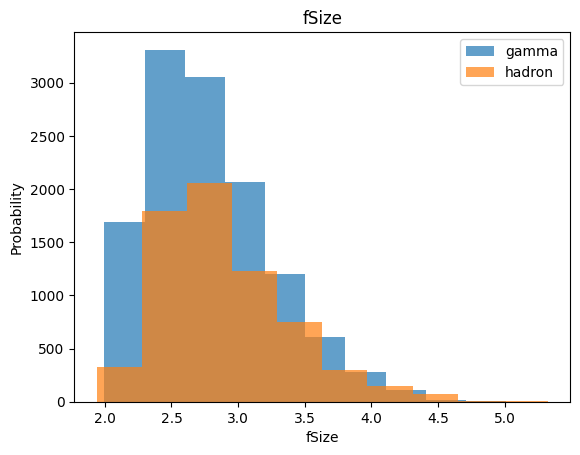

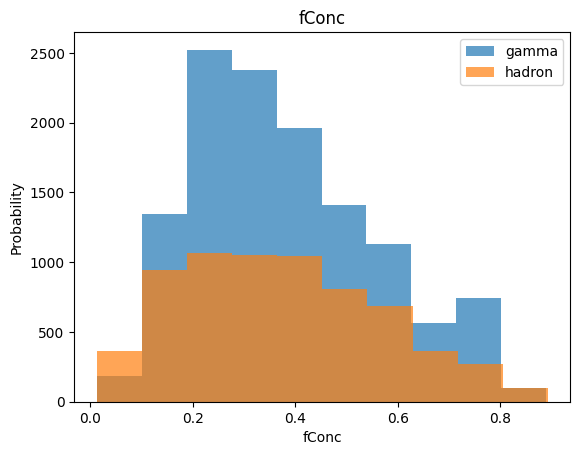

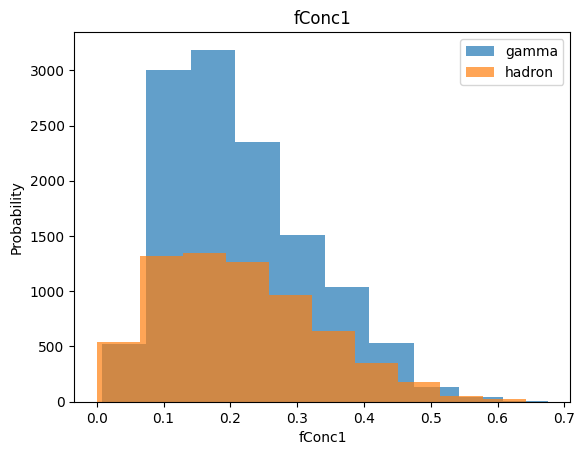

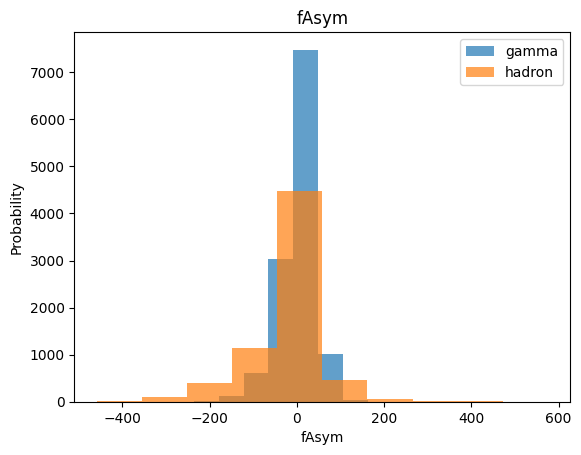

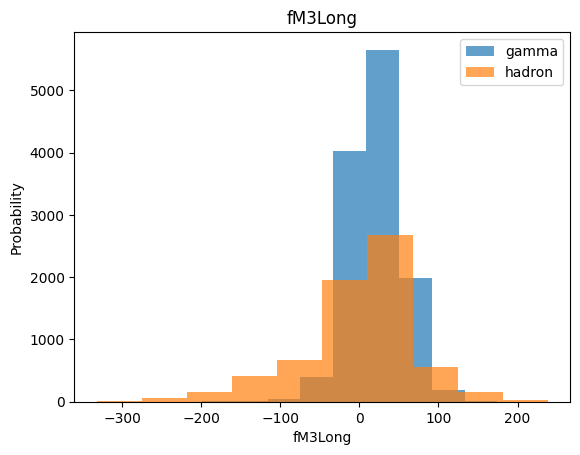

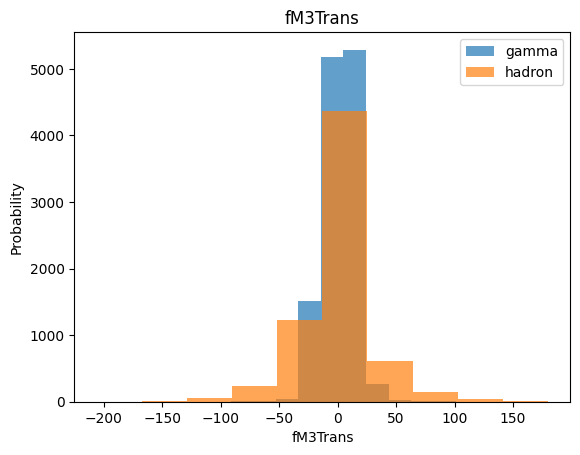

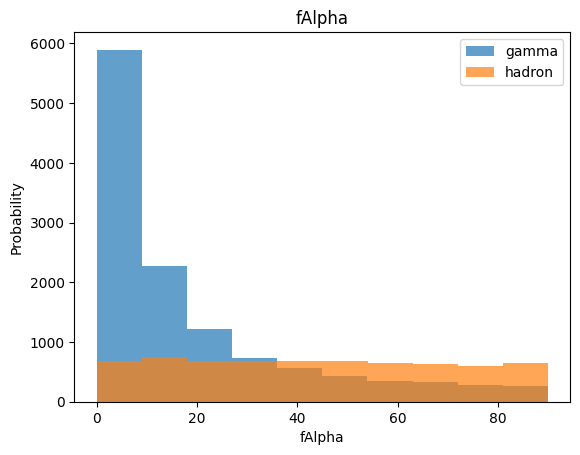

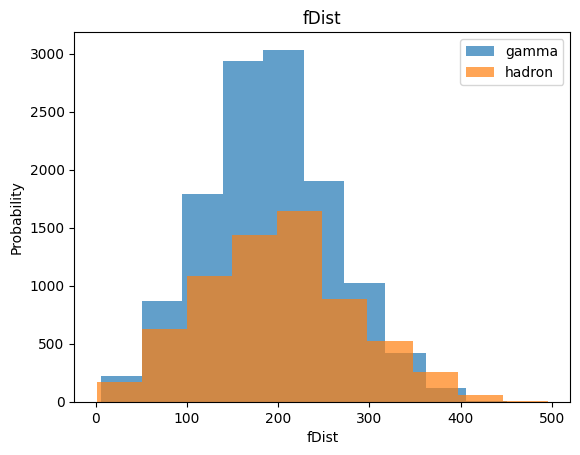

In [4]:
for label in df.columns[:-1]:
  plt.hist(df[df['class'] == 1][label], label="gamma", alpha=0.7)
  plt.hist(df[df['class'] == 0][label], label="hadron", alpha=0.7)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()




## Train , Validation , Test Datasets

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [6]:
test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11992,80.5977,25.2785,3.4706,0.2017,0.1206,-87.6173,60.1734,-9.0013,2.3504,242.970,1
11410,24.4285,0.0000,2.0434,0.7059,0.3756,27.5567,12.9859,0.0000,49.8852,135.890,1
7207,94.7720,30.7871,3.5949,0.1050,0.0527,18.7028,85.4046,17.1236,4.1090,200.597,1
5368,53.8114,29.2116,3.1370,0.1597,0.0923,42.8506,14.6894,17.8452,0.0350,146.772,1
11238,18.6575,9.8140,2.3909,0.6301,0.3598,-0.7357,5.8616,6.4813,6.9844,234.690,1
...,...,...,...,...,...,...,...,...,...,...,...
7055,54.3778,15.8934,2.7239,0.3890,0.2162,-87.2537,44.6409,13.3562,7.6374,243.857,1
9198,31.3363,10.0005,2.4456,0.4839,0.2634,-18.2729,-24.6263,6.8461,10.0250,138.553,1
6643,20.2586,9.5737,2.2553,0.6167,0.4083,3.3290,-14.4906,9.5510,48.6035,78.089,1
9744,78.8664,17.3947,2.9151,0.3088,0.1574,-94.2446,59.5806,-18.0118,3.4423,304.903,1


In [7]:
# We need to scale datasets so the mean of datasets would be similar
def scale_dataset(dataframe):
  x = dataframe[dataframe.cols[:-1]].values
  y = dataframe[dataframe.cols[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)